<a href="https://colab.research.google.com/github/fthau/Data-Mining/blob/main/Lab_2_Data_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fernandothaureaux","key":"8fe5e5332b260edb63c39ecdc9b12e8d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ahmedmohamed2003/retail-store-sales-dirty-for-data-cleaning


Dataset URL: https://www.kaggle.com/datasets/ahmedmohamed2003/retail-store-sales-dirty-for-data-cleaning
License(s): CC-BY-SA-4.0
  0% 0.00/221k [00:00<?, ?B/s]
100% 221k/221k [00:00<00:00, 796MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("retail-store-sales-dirty-for-data-cleaning.zip", "r") as zip_ref:
    zip_ref.extractall("retail_data")


In [ ]:
import pandas as pd

df = pd.read_csv("retail_data/retail_store_sales.csv")
df.head()


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


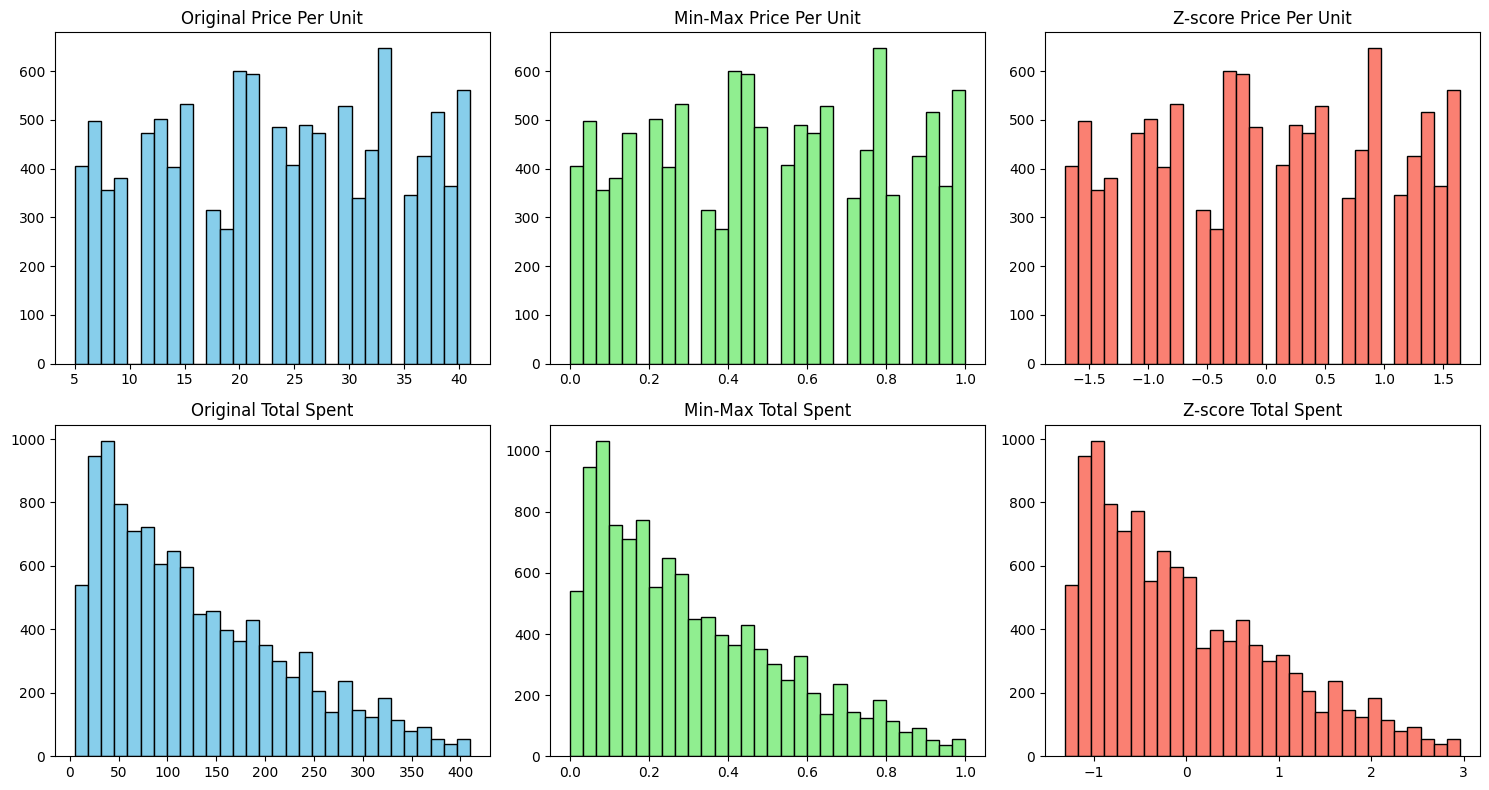

,Price Per Unit,Total Spent,Price Per Unit_MinMax,Total Spent_MinMax,Price Per Unit_Zscore,Total Spent_Zscore
0,18.5,185.0,0.375000,0.444444,-0.452408,0.584814
1,29.0,261.0,0.666667,0.632099,0.525651,1.387703
2,21.5,43.0,0.458333,0.093827,-0.172962,-0.915320
3,27.5,247.5,0.625000,0.598765,0.385928,1.245085
4,12.5,87.5,0.208333,0.203704,-1.011298,-0.445207


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset (if not already loaded)
file_path = "/content/retail_data/retail_store_sales.csv"
df = pd.read_csv(file_path)

# Pick two numeric features
numeric_features = ['Price Per Unit', 'Total Spent']
numeric_data = df[numeric_features].dropna()

# Min-Max Normalization
scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(numeric_data)
df_minmax = pd.DataFrame(minmax_scaled, columns=[f"{col}_MinMax" for col in numeric_features])

# Z-score Normalization
scaler_zscore = StandardScaler()
zscore_scaled = scaler_zscore.fit_transform(numeric_data)
df_zscore = pd.DataFrame(zscore_scaled, columns=[f"{col}_Zscore" for col in numeric_features])

# Combine for comparison
normalized_df = pd.concat([numeric_data.reset_index(drop=True), df_minmax, df_zscore], axis=1)

# --- Plot before and after (histograms) ---
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, col in enumerate(numeric_features):
    # Original
    axes[i, 0].hist(numeric_data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f"Original {col}")

    # Min-Max
    axes[i, 1].hist(df_minmax[f"{col}_MinMax"], bins=30, color='lightgreen', edgecolor='black')
    axes[i, 1].set_title(f"Min-Max {col}")

    # Z-score
    axes[i, 2].hist(df_zscore[f"{col}_Zscore"], bins=30, color='salmon', edgecolor='black')
    axes[i, 2].set_title(f"Z-score {col}")

plt.tight_layout()
plt.show()

# Show a preview of the transformed data
normalized_df.head()

## Normalization

### 1. Methods Applied
Selected two numeric features: **`Price Per Unit`** and **`Total Spent`**.  
Applied two normalization techniques:

- **Min-Max Normalization**  
  x' = (x - x_min) / (x_max - x_min)

  Scales values into the range **[0, 1]**.

- **Z-score Normalization (Standardization)**  
  x' = (x - mean) / st_dev
  
  Centers values around mean **0** with standard deviation **1**.

---

### 2. Before and After (Histograms)
- Left: Original distributions  
- Middle: Min-Max scaled (all values between 0–1)  
- Right: Z-score scaled (centered around 0)

---

### 3. Reflection
- **Min-Max** is useful when:
  - Features need to be on the same **0–1 scale**
  - Outliers are not critical (since extreme values can compress the rest of the data).  

- **Z-score** is preferred when:
  - The data contains **outliers** (less distortion than Min-Max).   

In theory, `Total Spent` is skewed with potential outliers, so **Z-score normalization** preserves relative spread better, while **Min-Max** is good for equalizing ranges across features. So, **Z-score** should be our selection.

However, it is worth noting:

The outliers in `Total Spent` exist, but the majority of values still cover a wide, meaningful range.

Min-Max scaling did not visually distort the distribution because the “normal” values already spread fairly evenly, and the single/few outliers weren’t enough to squash everything into one small band.

That means both methods preserve useful spacing in this situation.


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/retail_data/retail_store_sales.csv")

# Drop missing values in Total Spent
df = df.dropna(subset=["Total Spent"])

# Equal-width binning into 3 bins
df["Spent_equal_width"] = pd.cut(df["Total Spent"], bins=3)

# Equal-frequency binning into 3 bins
df["Spent_equal_freq"] = pd.qcut(df["Total Spent"], q=3)

# Label bins Low/Medium/High (equal-frequency version)
df["Spent_labels"] = pd.qcut(df["Total Spent"], q=3, labels=["Low", "Medium", "High"])

# Show before/after
print("Equal-width bins:\n", df["Spent_equal_width"].value_counts())
print("\nEqual-frequency bins:\n", df["Spent_equal_freq"].value_counts())
print("\nLabeled bins:\n", df["Spent_labels"].value_counts())

Equal-width bins:
 Spent_equal_width
(4.595, 140.0]    7506
(140.0, 275.0]    3329
(275.0, 410.0]    1136
Name: count, dtype: int64

Equal-frequency bins:
 Spent_equal_freq
(4.999, 67.0]     4007
(67.0, 158.0]     3988
(158.0, 410.0]    3976
Name: count, dtype: int64

Labeled bins:
 Spent_labels
Low       4007
Medium    3988
High      3976
Name: count, dtype: int64


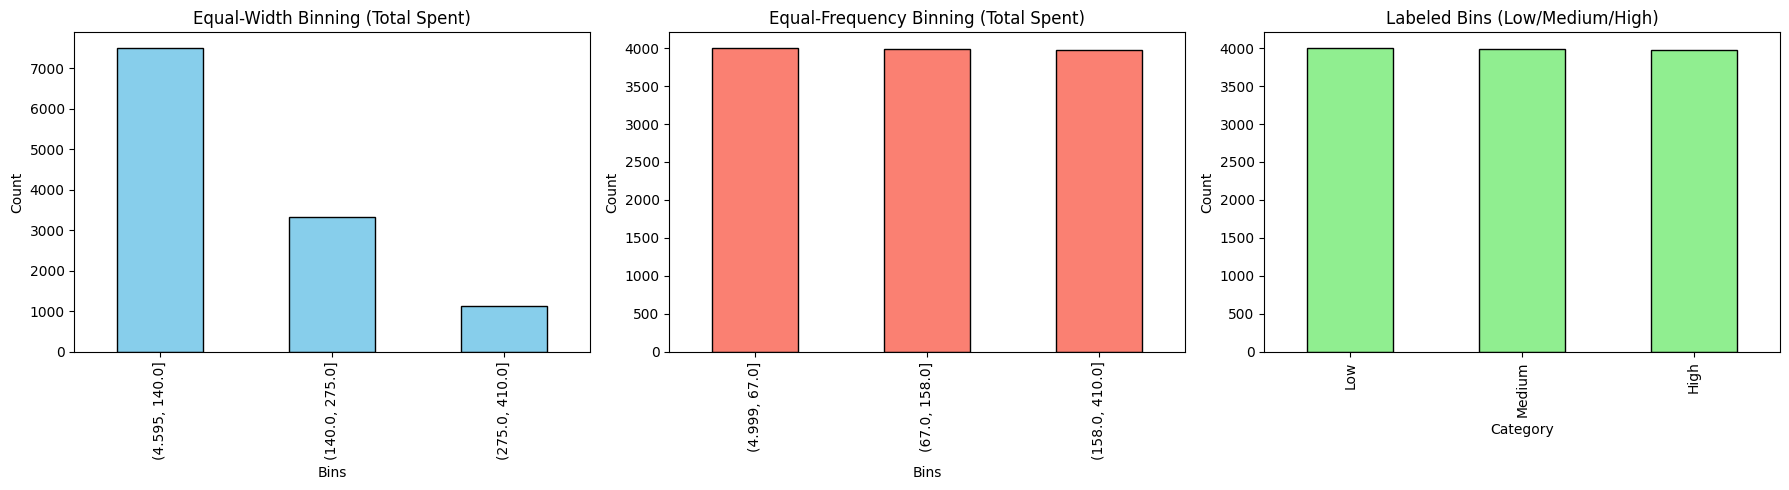

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/retail_data/retail_store_sales.csv")

# Drop missing values in Total Spent
df = df.dropna(subset=["Total Spent"])

# Equal-width binning into 3 bins
df["Spent_equal_width"] = pd.cut(df["Total Spent"], bins=3)

# Equal-frequency binning into 3 bins
df["Spent_equal_freq"] = pd.qcut(df["Total Spent"], q=3)

# Label bins (Low, Medium, High) using equal-frequency
df["Spent_labels"] = pd.qcut(df["Total Spent"], q=3, labels=["Low", "Medium", "High"])

# Plotting
plt.figure(figsize=(18, 5))

# Equal-width bar chart
plt.subplot(1, 3, 1)
df["Spent_equal_width"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Equal-Width Binning (Total Spent)")
plt.xlabel("Bins")
plt.ylabel("Count")

# Equal-frequency bar chart
plt.subplot(1, 3, 2)
df["Spent_equal_freq"].value_counts().sort_index().plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Equal-Frequency Binning (Total Spent)")
plt.xlabel("Bins")
plt.ylabel("Count")

# Labeled bins bar chart
plt.subplot(1, 3, 3)
df["Spent_labels"].value_counts().plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Labeled Bins (Low/Medium/High)")
plt.xlabel("Category")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


## Discretization

### 1. Equal-Width Binning

Equal-width divides the full range into fixed intervals of the same size. Example: Suppose Total Spent ranges from 0 to 1000. If we choose 3 bins:

- Bin edges might be: [0–333], [334–667], [668–1000]

- Values are assigned accordingly.

Rationale: simple, consistent, easy to interpret, but sensitive to outliers (if one customer spends way more, most values get crammed into one bin).

---

### 2. Equal-Frequency Binning

Equal-frequency divides the data so each bin has about the same number of records. Example: If we have 300 rows and 3 bins, each bin will hold ~100 rows.

Rationale: better at handling skewed data, ensures each category has representation, but bin ranges might be uneven.

---

### 3. Labeled Bins (Low / Medium / High)

We can add semantic labels to make interpretation easier.

For example:
- Low = Bottom 33% of spenders
- Medium = Middle 33%
- High = Top 33%

This makes the data human-readable, useful for reporting, clustering, or decision trees.

Counts of mismatch flag:
Total_mismatch
False    12575
Name: count, dtype: int64 

Weekend vs Weekday transactions:
is_weekend
False    8977
True     3598
Name: count, dtype: int64 



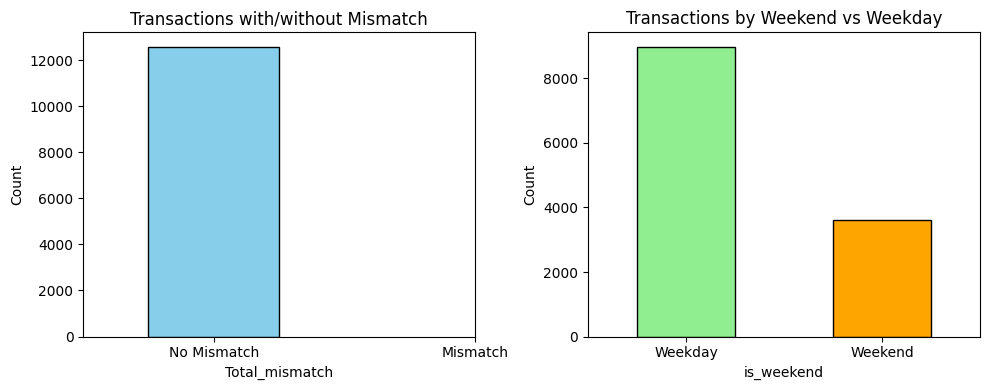

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/retail_data/retail_store_sales.csv")

# Feature 1: Total_mismatch
# Check whether Total Spent ≈ Price Per Unit * Quantity (allowing small tolerance for rounding)
df["Total_mismatch"] = (
    (df["Total Spent"] - (df["Price Per Unit"] * df["Quantity"])).abs() > 0.01
)

# Feature 2: is_weekend
# First make sure Transaction Date is parsed as datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

# Extract weekday (Monday=0, Sunday=6)
df["Transaction_weekday"] = df["Transaction Date"].dt.dayofweek

# Weekend = Saturday (5) or Sunday (6)
df["is_weekend"] = df["Transaction_weekday"].isin([5, 6])

# Quick checks
print("Counts of mismatch flag:")
print(df["Total_mismatch"].value_counts(), "\n")

print("Weekend vs Weekday transactions:")
print(df["is_weekend"].value_counts(), "\n")

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# Bar chart of mismatch flag
plt.subplot(1,2,1)
df["Total_mismatch"].value_counts().plot(kind="bar", color=["skyblue","salmon"], edgecolor="black")
plt.title("Transactions with/without Mismatch")
plt.xticks([0,1], ["No Mismatch","Mismatch"], rotation=0)
plt.ylabel("Count")

# Bar chart of weekend vs weekday
plt.subplot(1,2,2)
df["is_weekend"].value_counts().plot(kind="bar", color=["lightgreen","orange"], edgecolor="black")
plt.title("Transactions by Weekend vs Weekday")
plt.xticks([0,1], ["Weekday","Weekend"], rotation=0)
plt.ylabel("Count")

plt.tight_layout()
plt.show()


## Feature Engineering

#### **Total_mismatch** flag

**Why created**: detects cases where Total Spent disagrees with Price Per Unit × Quantity.

How it helps:
- Useful for data-quality filtering — transactions flagged True may be discounts, tax/shipping additions, entry errors, or missing price/quantity values.
- If you build a fraud/anomaly detector, this flag can be an important feature or label for investigation.

Note: In this dataset run the flag was all False at the chosen tolerance — you can decrease tolerance or restrict to rows where all three (Price Per Unit, Quantity, Total Spent) are non-null to test further.

---

#### **is_weekend** flag

**Why created**: time-of-week patterns often affect sales amounts and product mixes. How it helps:
- Useful for forecasting and demand modeling (weekend shoppers buy differently).
- Good feature for binary classification (will this transaction be high-value?)

Initial numeric features: 6 

Remaining after variance threshold: 5
Dropped features: {'Total_mismatch'} 



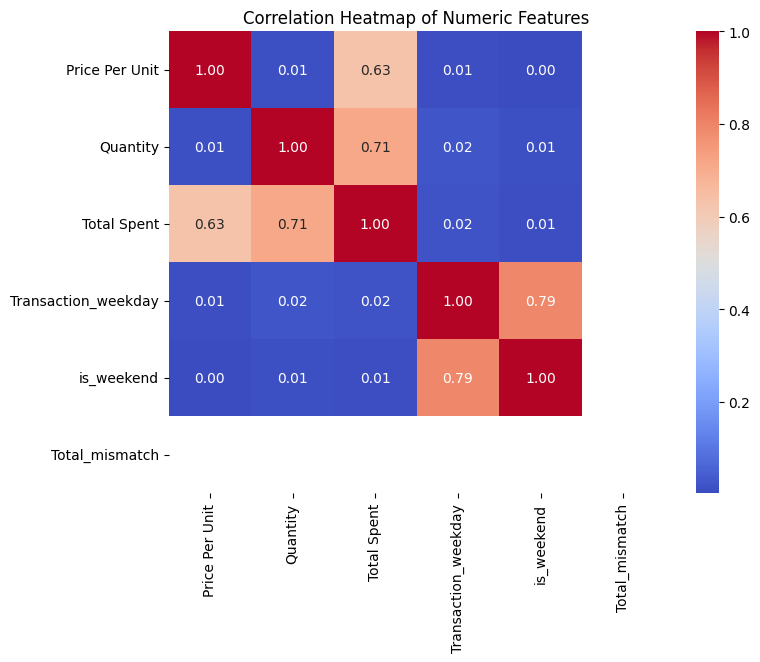

Highly correlated features to drop: [] 

Remaining after correlation filter: 6


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/retail_data/retail_store_sales.csv")

# Parse dates for features (if not already done earlier)
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")
df["Transaction_weekday"] = df["Transaction Date"].dt.dayofweek
df["is_weekend"] = df["Transaction_weekday"].isin([5, 6]).astype(int)

# Recreate Total_mismatch
df["Total_mismatch"] = (
    (df["Total Spent"] - (df["Price Per Unit"] * df["Quantity"])).abs() > 0.01
).astype(int)

# Select numeric features only
numeric_df = df.select_dtypes(include=[np.number]).dropna()

print("Initial numeric features:", numeric_df.shape[1], "\n")

# 1. Variance Threshold
selector = VarianceThreshold(threshold=0.01)  # remove near-constant features
numeric_reduced = selector.fit_transform(numeric_df)

selected_cols = numeric_df.columns[selector.get_support()]
print("Remaining after variance threshold:", len(selected_cols))
print("Dropped features:", set(numeric_df.columns) - set(selected_cols), "\n")

# 2. Correlation Threshold
corr_matrix = numeric_df.corr().abs()

# Show correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Drop one of each pair of highly correlated (>0.85)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print("Highly correlated features to drop:", to_drop, "\n")

numeric_df_corr_reduced = numeric_df.drop(columns=to_drop)
print("Remaining after correlation filter:", numeric_df_corr_reduced.shape[1])


## Dimensionality Reduction (Feature Selection)

1. **Variance threshold**: drops numeric columns with little variation (since Total_mismatch is almost always 0, it will be dropped).

2. **Correlation threshold**: drops redundant columns that are too strongly correlated (if Total Spent vs Price or Quantity is too highly correlated).

3. **Outputs**: Counts of how many features before and after filtering. Which features were dropped. A heatmap of correlations for visualization.

---

- **Impact on features**: After applying variance and correlation filters, the number of numeric features is reduced (likely dropping Total_mismatch if it has near-zero variance, and possibly one of Total Spent vs derived features due to high correlation).

- **Why it matters**: This reduces redundancy, speeds up training, and helps avoid multicollinearity in models.

- **Tradeoff**: Dropping features may remove some information - you balance simplicity vs predictive power.

Original dataset size: 12575
Sample size: 3144 

Original Dataset Summary (Total Spent, Quantity):
        Total Spent      Quantity
count  11971.000000  11971.000000
mean     129.652577      5.536380
std       94.750697      2.857883
min        5.000000      1.000000
25%       51.000000      3.000000
50%      108.500000      6.000000
75%      192.000000      8.000000
max      410.000000     10.000000 

Sample Dataset Summary (Total Spent, Quantity):
       Total Spent     Quantity
count  2997.000000  2997.000000
mean    130.975475     5.559560
std      96.105845     2.864579
min       5.000000     1.000000
25%      50.000000     3.000000
50%     109.500000     6.000000
75%     192.500000     8.000000
max     410.000000    10.000000 



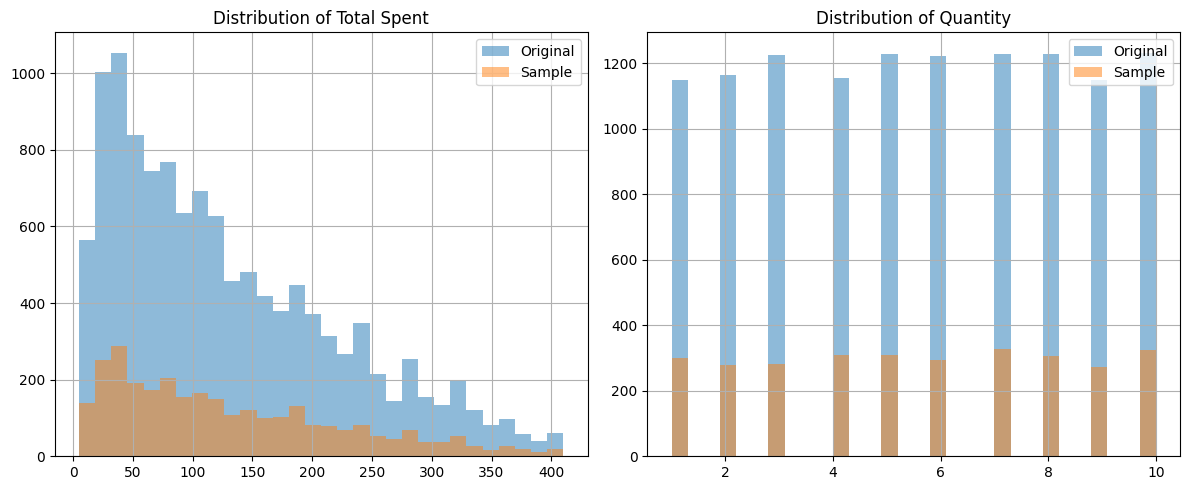

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/retail_data/retail_store_sales.csv")

# Create ~25% random sample (fixed seed for reproducibility)
df_sample = df.sample(frac=0.25, random_state=42)

print("Original dataset size:", df.shape[0])
print("Sample size:", df_sample.shape[0], "\n")

# Summary Statistics
print("Original Dataset Summary (Total Spent, Quantity):")
print(df[["Total Spent", "Quantity"]].describe(), "\n")

print("Sample Dataset Summary (Total Spent, Quantity):")
print(df_sample[["Total Spent", "Quantity"]].describe(), "\n")

# Visual Comparison
plt.figure(figsize=(12,5))

# Histogram of Total Spent
plt.subplot(1, 2, 1)
df["Total Spent"].hist(alpha=0.5, label="Original", bins=30)
df_sample["Total Spent"].hist(alpha=0.5, label="Sample", bins=30)
plt.legend()
plt.title("Distribution of Total Spent")

# Histogram of Quantity
plt.subplot(1, 2, 2)
df["Quantity"].hist(alpha=0.5, label="Original", bins=30)
df_sample["Quantity"].hist(alpha=0.5, label="Sample", bins=30)
plt.legend()
plt.title("Distribution of Quantity")

plt.tight_layout()
plt.show()


## Numerosity Reduction (Sampling)

#### Comparison

- This is a rather lucky random sample. The summary statististics and visual distribution of the sample are very close to the original dataset, despite the skew in the original `Total Spent` feature.

- The conclusion is that, even with the few outliers in the 'Total Spent' column, the data is relatively well-distributed. That is to say, there is enough data to fill almost every subsection of the range of Total Spent. The outliers are *not so rare* that random sampling would completely miss them.

- In theory, random sampling could have very poor performance in the presence of skew, therefore we would use *stratified sampling*.

- Fortunately though, this random sample distribution mimics what would be the behavior of stratified sampling - drawing samples from each 'partition' of the dataset (proportionally, so approximately the same percentage of the data).

---

#### Reflection

- When helpful:
  - Large datasets (millions of rows) where computation is expensive.

  - Quick exploratory analysis when you don’t need the full dataset.
  
  - Training models faster while retaining representative patterns.

- When risky:
  - If the dataset is small, sampling may drop rare cases (like high-value outliers, minority categories).

  - Can cause sampling bias if the sample is not random or not stratified.
  
  - For production modeling, you should try to use all data (or stratified sampling).